# 🏠 Airbnb Price Prediction - EDA
This notebook performs initial exploratory data analysis on the Airbnb dataset.

In [ ]:
# Setup: Clone repo and set working directory
# This allows anyone opening this notebook in Colab to access all project files
!git clone https://github.com/babakbaradaran/ml-projects.git
%cd ml-projects/01_airbnb_price_regression/

### Step 1: Import libraries

In [2]:
# We import Python libraries that help with:
#- Reading and working with data (`pandas`, `numpy`)
#- Plotting (`matplotlib`, `seaborn`)
#- Setting options to view more columns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
sns.set(style='whitegrid')

### Step 2: Dataset Validation and Setup

We begin by verifying the dataset path and loading it safely. This helps avoid runtime errors in environments like Google Colab or Codespaces.

In [6]:
import os

print("Current working directory:", os.getcwd())

Current working directory: /Users/babak/Github/ml-projects/01_airbnb_price_regression/notebooks


In [7]:
# Load Dataset with Validations

# Set the data path
data_path = '../data/raw/listings.csv'

# Check if file exists
assert os.path.exists(data_path), f"Data file not found at: {data_path}"

# Load the data
df = pd.read_csv(data_path)

# Confirm it loaded
print(f"Loaded successfully. Shape: {df.shape}")
df.sample(5)

Loaded successfully. Shape: (5596, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
5061,1329252231246438387,Luxury Waterfront Living at Fairmont Pacific Rim,592354766,Monica,NaN,Downtown,49.288420,-123.117830,Entire home/apt,550.0,30,0,NaN,NaN,30,177,0,Municipal registration number: 24-453112<br />...
4478,1213465787149676040,Luxury Condo with Mountain Views,306585246,Gregory Harrison,NaN,Mount Pleasant,49.269585,-123.108018,Entire home/apt,275.0,30,1,2025-04-17,1.00,1,190,1,Provincial registration number: H276246048
4024,1129914173041630771,Stunning ocean/mountain views in new build,256063093,Paige,NaN,Downtown,49.276108,-123.129821,Entire home/apt,150.0,90,2,2024-08-05,0.19,1,237,2,NaN
1223,35090765,🌟Modern 2BR+Den+2BA Heart of Downtown + Parking,79137483,Sadaf,NaN,West End,49.288070,-123.127770,Entire home/apt,NaN,30,56,2025-03-15,0.79,1,0,4,Municipal registration number: 19-244440
1238,35222652,Heart of Downtown 1 bdrm +Pool/Gym/Free Parking,50500908,Tsz Kit,NaN,Downtown,49.279510,-123.108740,Entire home/apt,209.0,2,287,2025-04-25,4.04,1,81,37,Municipal registration number: 24-186903<br />...


### Step 3: Load the dataset

In [9]:
df = pd.read_csv(data_path)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,13188,Garden level studio in ideal loc.,51466,Emma,NaN,Riley Park,49.247730,-123.105090,Entire home/apt,136.0,2,350,2025-05-04,1.89,1,109,56,Municipal registration number: 25-156058<br />...
1,13358,Downtown Designer suite,52116,Lynn,NaN,Downtown,49.281174,-123.125931,Entire home/apt,225.0,1,565,2025-05-04,3.11,1,135,50,Municipal registration number: 25-157257
2,16254,Close to PNE/Hastings Park Garden level suite,63238,Jason,NaN,Hastings-Sunrise,49.277210,-123.040860,Entire home/apt,680.0,5,7,2022-07-30,0.09,1,249,0,NaN
3,16611,"1 block to skytrain station, shops,restaurant,...",58512,Q,NaN,Grandview-Woodland,49.263390,-123.071450,Entire home/apt,NaN,365,3,2018-02-16,0.03,5,89,0,NaN
4,17765,"Central location, nice little apartment",68672,James,NaN,Mount Pleasant,49.261320,-123.108450,Entire home/apt,NaN,5,203,2021-10-01,1.32,1,0,0,Municipal registration number: 21-156705


### Step 4: Data overview

In [10]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

Shape: (5596, 18)

Data Types:
 id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


### Step 5: Summary Table for All Columns

This table summarizes each feature in the dataset, showing its type, percentage of missing data, number of unique values, and a few sample entries.

In [11]:
summary = pd.DataFrame({
    "Data Type": df.dtypes,
    "% Missing": df.isnull().mean() * 100,
    "# Unique": df.nunique(),
    "Sample Values": df.apply(lambda x: x.dropna().unique()[:3])
}).sort_values("% Missing", ascending=False)

summary.style.background_gradient(cmap='Blues', subset=["% Missing"])



,Data Type,% Missing,# Unique,Sample Values
neighbourhood_group,float64,100.000000,0,[]
license,object,21.926376,3574,['Municipal registration number: 25-156058Provincial registration number: H403372913' 'Municipal registration number: 25-157257' 'Municipal registration number: 21-156705']
price,float64,18.084346,609,[136. 225. 680.]
last_review,object,14.421015,909,['2025-05-04' '2022-07-30' '2018-02-16']
reviews_per_month,float64,14.421015,668,[1.89 3.11 0.09]
host_name,object,0.071480,2303,['Emma' 'Lynn' 'Jason']
host_id,int64,0.000000,3802,[51466 52116 63238]
neighbourhood,object,0.000000,23,['Riley Park' 'Downtown' 'Hastings-Sunrise']
latitude,float64,0.000000,4506,[49.24773 49.28117371 49.27721 ]
longitude,float64,0.000000,4865,[-123.10509 -123.12593079 -123.04086 ]


### Step 6: Clean Currency Columns

Convert dollar string fields like `price`, `cleaning_fee`, and `security_deposit` into numeric types for analysis.

In [12]:
currency_cols = ['price', 'security_deposit', 'cleaning_fee']
for col in currency_cols:
    if col in df.columns:
        df[col] = df[col].replace(r'[\$,]', '', regex=True).astype(float)

### Step 7: Check Missing Values

We identify the top features with missing values to prepare for cleaning or imputation.

In [13]:
df.isnull().sum().sort_values(ascending=False).head(15)

neighbourhood_group               5596
license                           1227
price                             1012
last_review                        807
reviews_per_month                  807
host_name                            4
host_id                              0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
name                                 0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
dtype: int64

### Step 8: Price Distribution

This shows the raw price distribution, which is typically right-skewed.

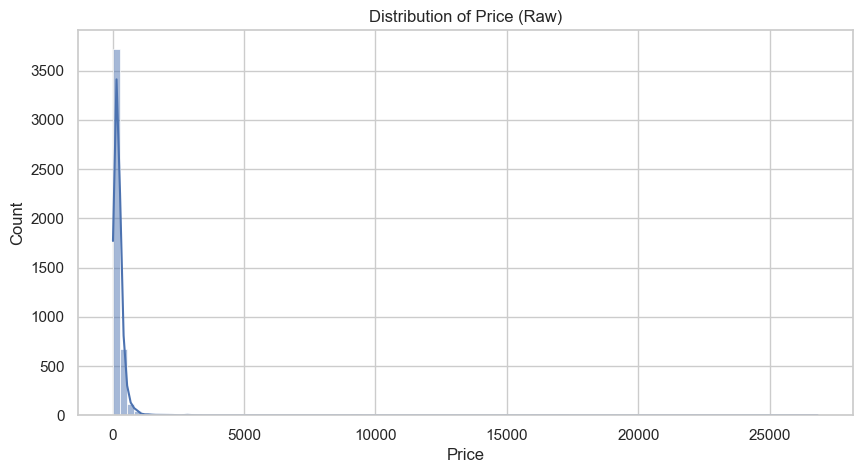

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=100, kde=True)
plt.title('Distribution of Price (Raw)')
plt.xlabel('Price')
plt.show()

### Step 9: Log-Transformed Price

Since price is skewed, log transformation helps normalize it for modeling.

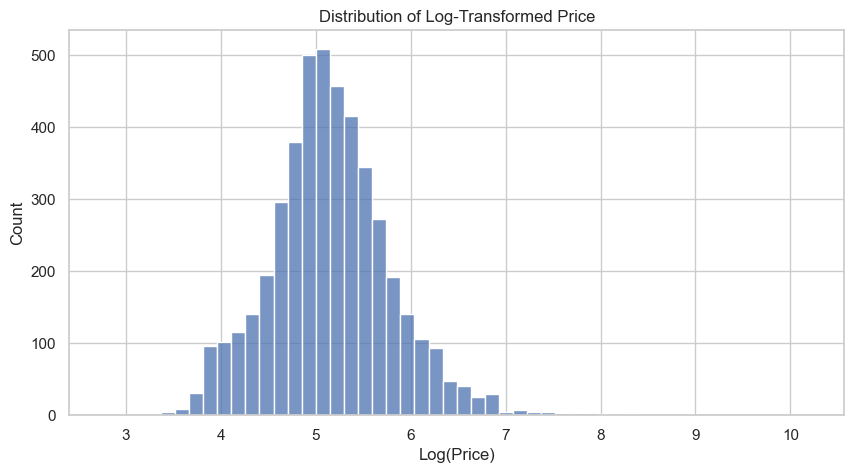

In [15]:
df['price_log'] = np.log1p(df['price'])

plt.figure(figsize=(10, 5))
sns.histplot(df['price_log'], bins=50)
plt.title('Distribution of Log-Transformed Price')
plt.xlabel('Log(Price)')
plt.show()


### Step 10: Correlation Heatmap

This heatmap reveals relationships between numeric features, especially price.

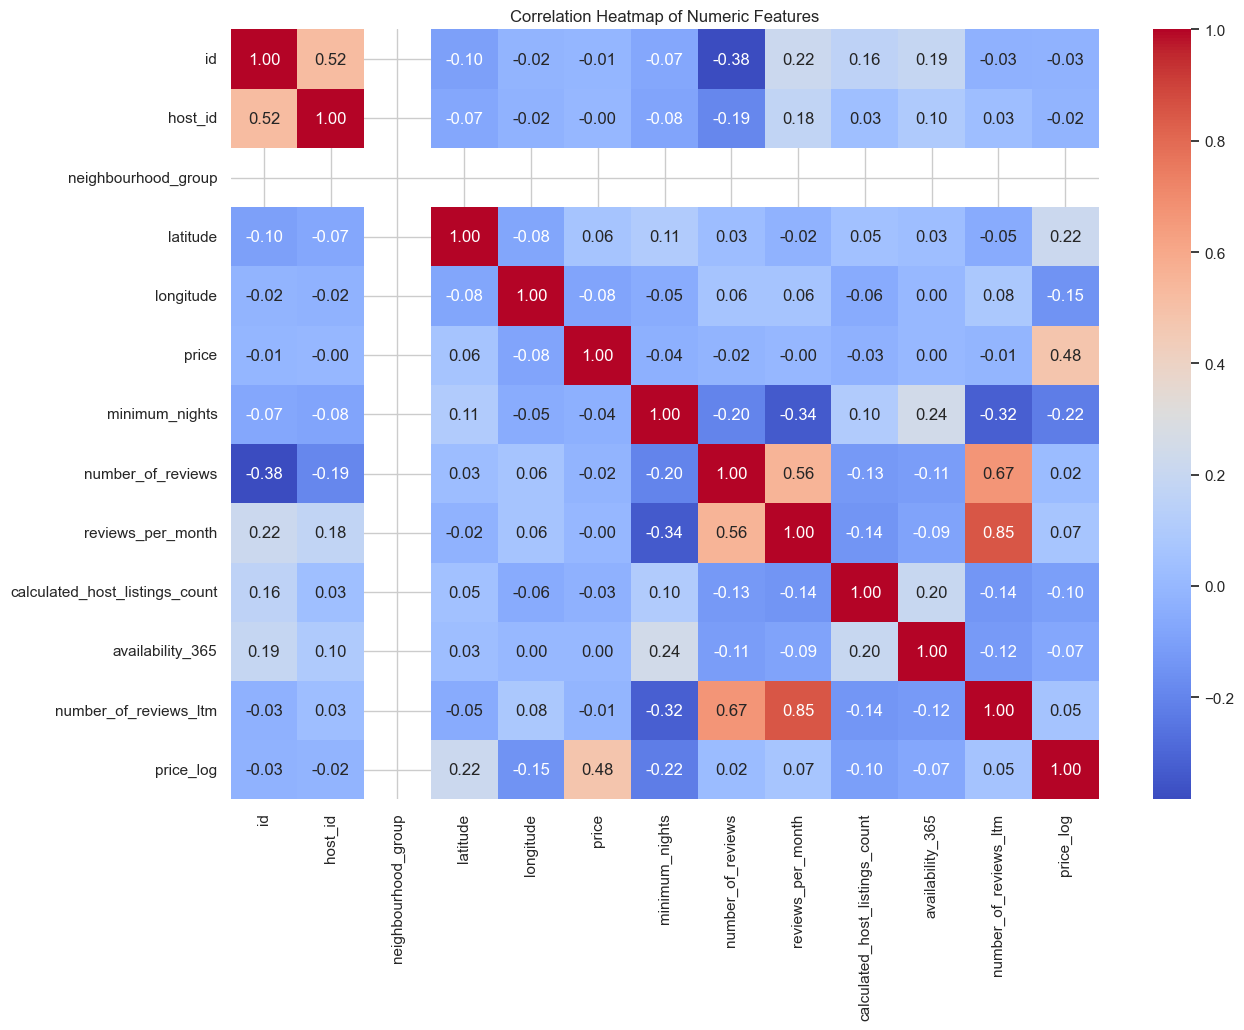

In [16]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

### Step 10: Categorical Feature Analysis

We explore key categorical variables and how they influence Airbnb listing prices. This includes bar plots, box plots, and count distributions for features like `room_type`, `neighbourhood`, and `property_type`.


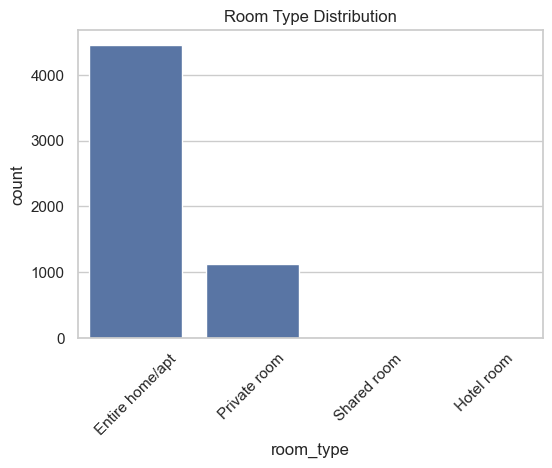

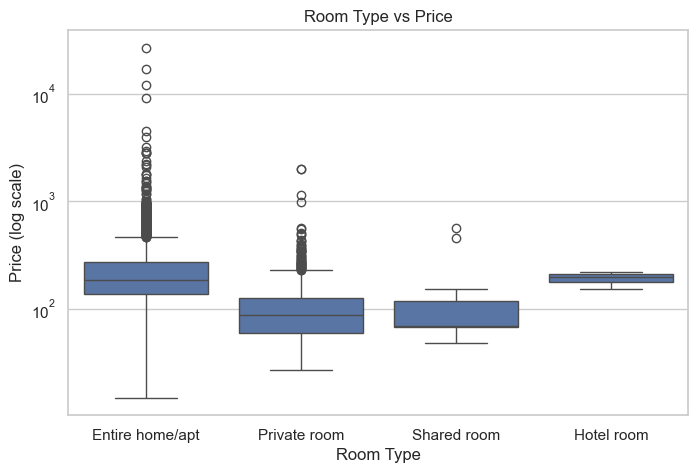

In [17]:
# Room type distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index)
plt.title('Room Type Distribution')
plt.xticks(rotation=45)
plt.show()

# Room type vs. price (log scale for better visual)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='room_type', y='price')
plt.yscale('log')
plt.title('Room Type vs Price')
plt.xlabel('Room Type')
plt.ylabel('Price (log scale)')
plt.show()

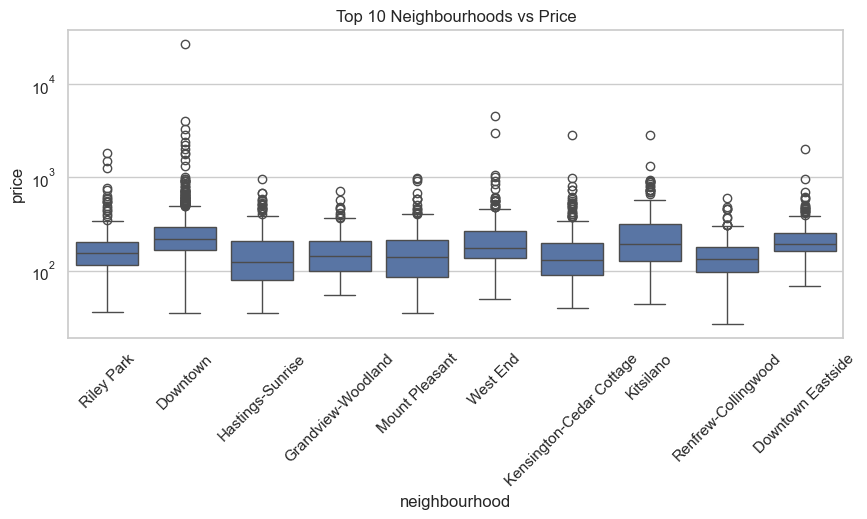

In [18]:
# Top 10 neighbourhoods by listing count
top_n = df['neighbourhood'].value_counts().nlargest(10).index
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[df['neighbourhood'].isin(top_n)], x='neighbourhood', y='price')
plt.xticks(rotation=45)
plt.yscale('log')
plt.title('Top 10 Neighbourhoods vs Price')
plt.show()

In [20]:
# Top 10 property types
# Check if 'property_type' exists before plotting
if 'property_type' in df.columns:
    top_p = df['property_type'].value_counts().nlargest(10).index
    plt.figure(figsize=(12, 5))
    sns.boxplot(data=df[df['property_type'].isin(top_p)], x='property_type', y='price')
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title('Top 10 Property Types vs Price')
    plt.show()
else:
    print("⚠️ 'property_type' column not found in dataset. Skipping this step.")

⚠️ 'property_type' column not found in dataset. Skipping this step.
